<style>
    td, th {
        border: none!important
    }
</style>

<center><h1> МИНОБРНАУКИ РОССИИ                 </h1></center>
<center><h1>САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ </h1></center>
<center><h1>ЭЛЕКТРОТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ      </h1></center>
<center><h1>"ЛЭТИ" ИМ. В.И. УЛЬЯНОВА (ЛЕНИНА)   </h1></center>
<center><h1>Кафедра МО ЭВМ                      </h1></center>
<br>
<br>
<br>
<br>
<center><h1>ОТЧЕТ                               </h1></center>
<center><h2>по лабораторной работе №1           </h2></center>
<center><h2>По дисциплине "Машинное Обучение"   </h2></center>
<center><h2>Тема: Предобработка данных          </h2></center>
<br>
<br>
<br>
<br>

<center>

| | | |
| :-- | --: | :-- |
| Студент гр. 8303:   |<pre>       ____________</pre>|  Гришин К.И.       |
| Преподаватель       |<pre>       ____________</pre>|  Жангиров Т.Р.     |

</center>

<br>
<br>
<br>

<center><h6>Санкт-Петербург</h6></center>
<center><h6>2021</h6></center>

------------------------

# Helper functions

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_data(data, bins, keys):
    _, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

    for i in range(6):
        x = i%3; y = i//3
        axs[y, x].hist(data[:, i], bins=bins, ec='black')
        axs[y, x].set_title(keys[i])

    plt.show()

def plot_data_frame(data_frame, bins):
    keys = data_frame.keys()
    plot_data(data_frame.to_numpy(), bins, keys)

def describe_data_frame(data_frame):
    return data_frame.describe().append(
        pd.DataFrame(data_frame.var(), columns=['variance']).T
    ).append(
        data_frame.mode().rename(index={0: 'mode'})
    ).drop(['count']).round(2)

# Загрузка данных

In [346]:

csv_path = 'heart_failure_clinical_records_dataset.csv'
data_frame = pd.read_csv(csv_path)

data_frame = data_frame.drop(columns= [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'
])

In [347]:
data_frame_sorted = pd.concat([data_frame[col].sort_values().reset_index(drop=True) for col in data_frame], axis=1)
data_sorted = data_frame_sorted.to_numpy()
data_frame_sorted

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,40.0,23,14,25100.0,0.5,113
1,40.0,30,15,47000.0,0.6,116
2,40.0,47,15,51000.0,0.6,121
3,40.0,47,17,62000.0,0.6,124
4,40.0,47,17,70000.0,0.6,125
...,...,...,...,...,...,...
294,90.0,4540,62,533000.0,5.8,145
295,90.0,5209,62,543000.0,6.1,145
296,94.0,5882,65,621000.0,6.8,145
297,95.0,7702,70,742000.0,9.0,146


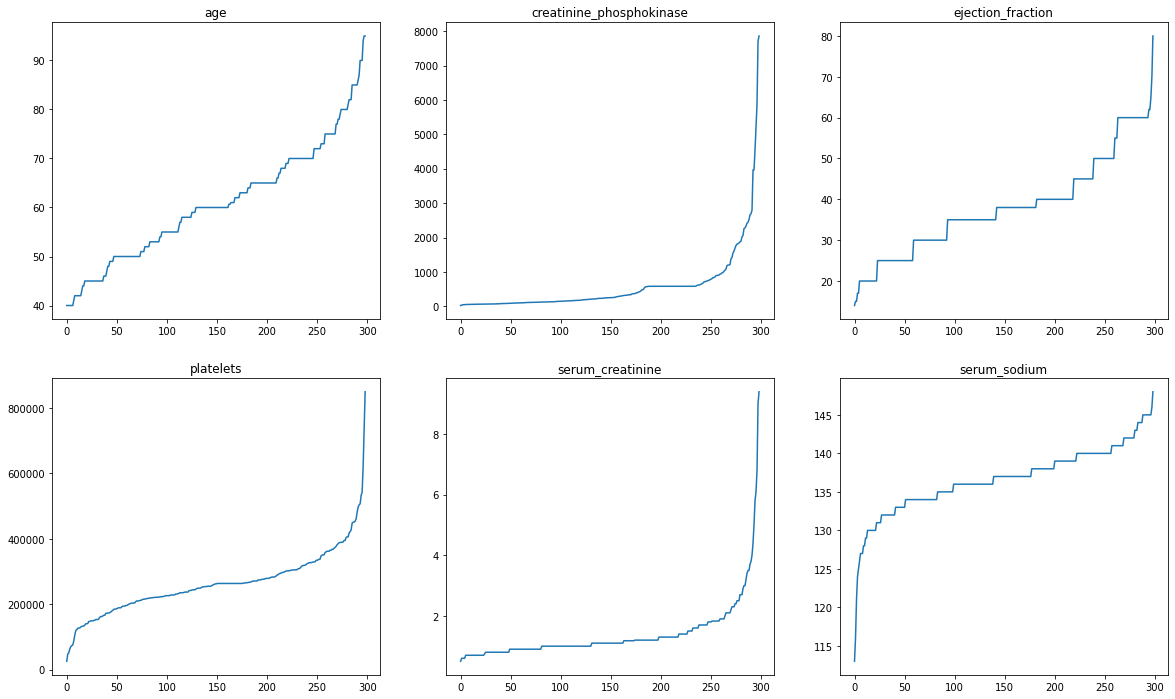

In [348]:
keys = data_frame.keys()
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
for i in range(6):
    x = i%3; y = i//3
    axs[y, x].plot(np.arange(0, len(data_sorted[:, i]), 1), data_sorted[:, i])
    axs[y, x].set_title(keys[i])
plt.show()

In [349]:
describe_data_frame(data_frame)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
std,11.89,970.29,11.83,9.780424e+04,1.03,4.41
min,40.00,23.00,14.00,2.510000e+04,0.50,113.00
25%,51.00,116.50,30.00,2.125000e+05,0.90,134.00
50%,60.00,250.00,38.00,2.620000e+05,1.10,137.00
75%,70.00,582.00,45.00,3.035000e+05,1.40,140.00
max,95.00,7861.00,80.00,8.500000e+05,9.40,148.00
variance,141.49,941458.57,140.06,9.565669e+09,1.07,19.47
mode,60.00,582.00,35.00,2.633580e+05,1.00,136.00


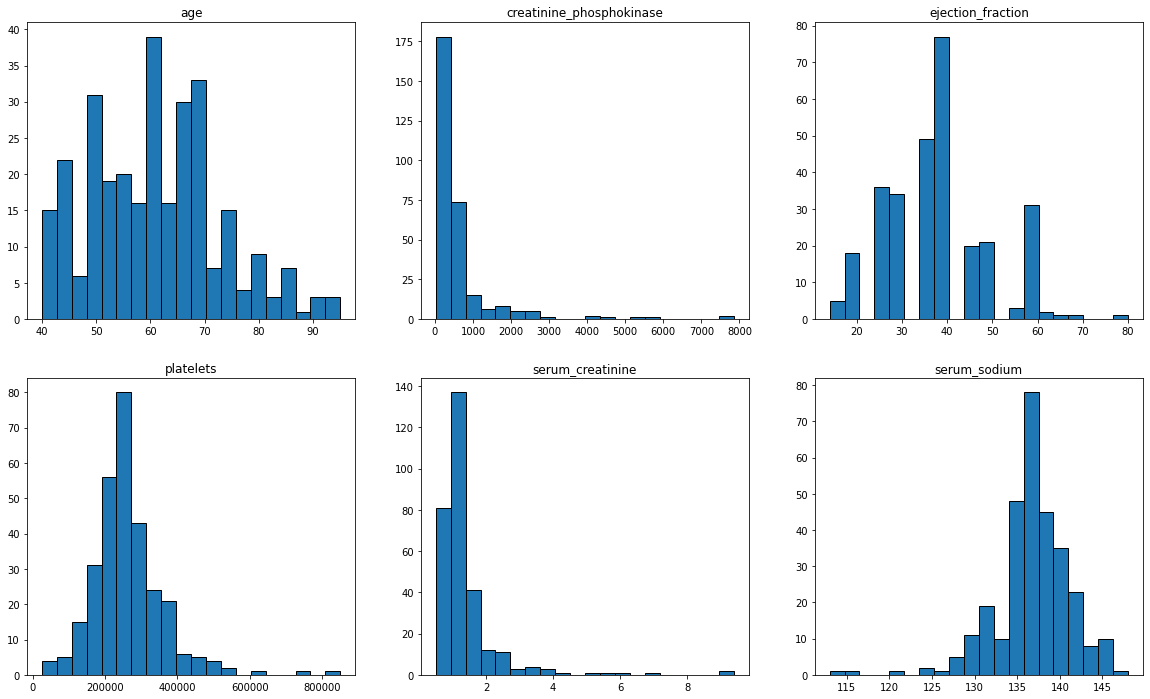

In [350]:
plot_data_frame(data_frame, 20)

In [351]:
describe_data_frame(data_frame)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
std,11.89,970.29,11.83,9.780424e+04,1.03,4.41
min,40.00,23.00,14.00,2.510000e+04,0.50,113.00
25%,51.00,116.50,30.00,2.125000e+05,0.90,134.00
50%,60.00,250.00,38.00,2.620000e+05,1.10,137.00
75%,70.00,582.00,45.00,3.035000e+05,1.40,140.00
max,95.00,7861.00,80.00,8.500000e+05,9.40,148.00
variance,141.49,941458.57,140.06,9.565669e+09,1.07,19.47
mode,60.00,582.00,35.00,2.633580e+05,1.00,136.00


# Стандартизация данных

In [352]:
data = data_frame.to_numpy(dtype='float')
scaler_partial = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled_partial = scaler_partial.transform(data)
data_frame_scaled_partial = pd.DataFrame(data=data_scaled_partial, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])

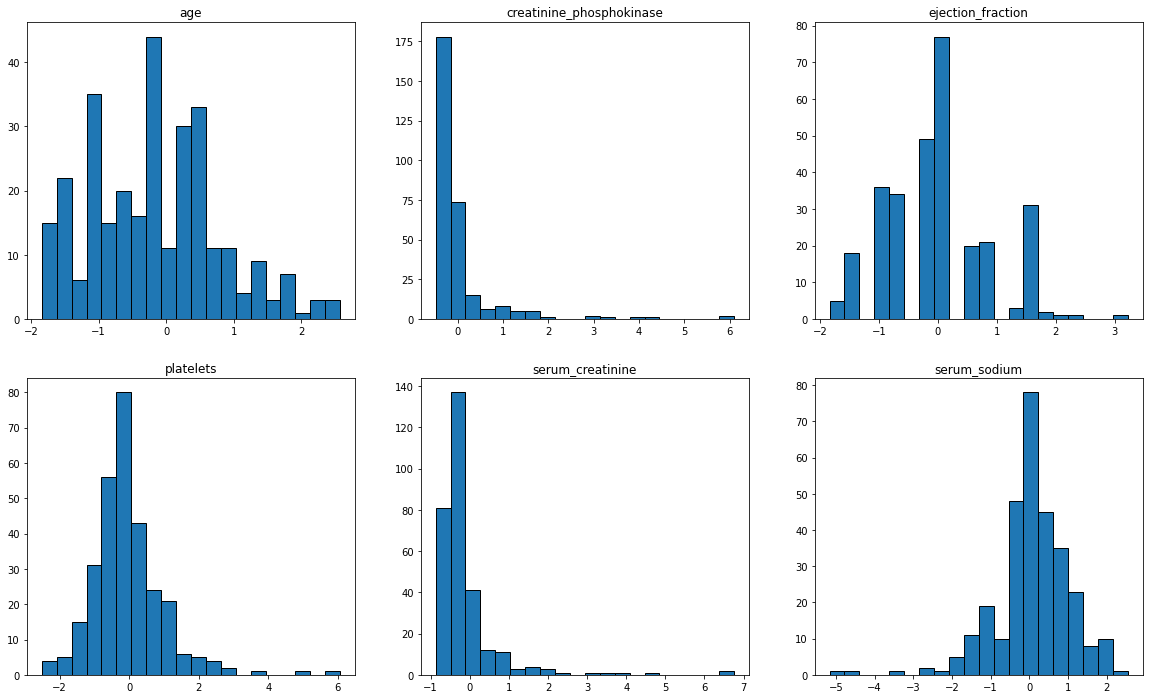

In [353]:
plot_data_frame(data_frame_scaled_partial, 20)

In [354]:
describe_data_frame(data_frame_scaled_partial)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.17,-0.02,0.01,-0.04,-0.11,0.04
std,0.96,0.82,0.91,1.02,0.89,0.97
min,-1.84,-0.49,-1.84,-2.51,-0.87,-5.17
25%,-0.96,-0.41,-0.61,-0.56,-0.53,-0.54
50%,-0.24,-0.30,0.00,-0.05,-0.36,0.12
75%,0.57,-0.02,0.54,0.38,-0.10,0.78
max,2.57,6.10,3.23,6.06,6.76,2.54
variance,0.91,0.67,0.82,1.03,0.79,0.94
mode,-0.24,-0.02,-0.23,-0.04,-0.45,-0.10


In [355]:
pivot = pd.concat([
    data_frame.mean(), data_frame.var(), data_frame_scaled_partial.mean(), data_frame_scaled_partial.var()
], axis=1, keys=["mean", "var", "scaled mean", "scaled var"])
pivot["scaler mean"] = scaler_partial.mean_
pivot["scaler var"] = scaler_partial.var_
pivot

,mean,var,scaled mean,scaled var,scaler mean,scaler var
age,60.833893,1.414865e+02,-0.169704,0.912833,62.946667,1.549972e+02
creatinine_phosphokinase,581.839465,9.414586e+05,-0.021277,0.665112,607.153333,1.415489e+06
ejection_fraction,38.083612,1.400635e+02,0.010502,0.823787,37.946667,1.700238e+02
platelets,263358.029264,9.565669e+09,-0.035229,1.033807,266746.749467,9.252860e+09
serum_creatinine,1.393880,1.070211e+00,-0.108641,0.786615,1.520600,1.360527e+00
serum_sodium,136.625418,1.946996e+01,0.037908,0.944785,136.453333,2.060782e+01


In [356]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

data_frame_scaled = pd.DataFrame(data=data_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])

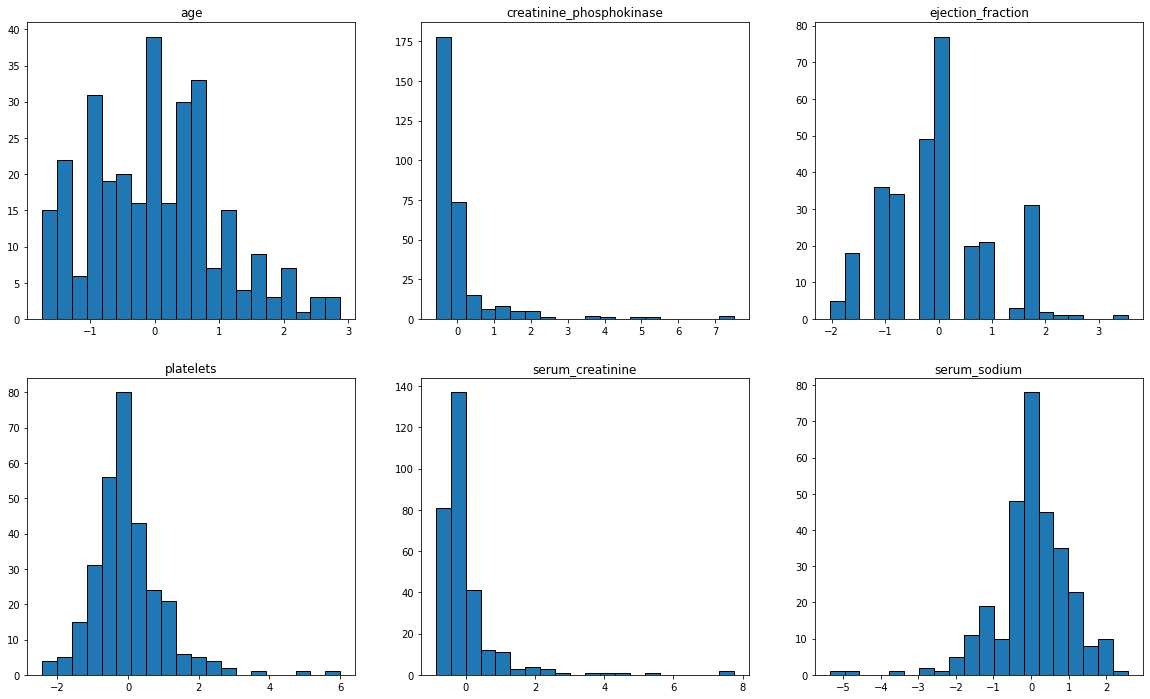

In [357]:
plot_data_frame(data_frame_scaled, 20)

In [358]:
describe_data_frame(data_frame_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-0.58,-2.04,-2.44,-0.87,-5.36
25%,-0.83,-0.48,-0.68,-0.52,-0.48,-0.60
50%,-0.07,-0.34,-0.01,-0.01,-0.28,0.09
75%,0.77,0.00,0.59,0.41,0.01,0.77
max,2.88,7.51,3.55,6.01,7.75,2.58
variance,1.00,1.00,1.00,1.00,1.00,1.00
mode,-0.07,0.00,-0.26,0.00,-0.38,-0.14


In [359]:
pd.concat([
    data_frame.mean(),
    data_frame.var(),
    data_frame_scaled_partial.mean(),
    data_frame_scaled_partial.var(),
    data_frame_scaled.mean(),
    data_frame_scaled.var(),
], axis=1, keys=[
    "mean",
    "var",
    "scaled partial mean",
    "scaled partial var",
    "scaled mean",
    "scaled var",
    ]
).transpose().round(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.834,581.839,38.084,2.633580e+05,1.394,136.625
var,141.486,941458.571,140.063,9.565669e+09,1.070,19.470
scaled partial mean,-0.170,-0.021,0.011,-3.500000e-02,-0.109,0.038
scaled partial var,0.913,0.665,0.824,1.034000e+00,0.787,0.945
scaled mean,0.000,0.000,-0.000,0.000000e+00,0.000,-0.000
scaled var,1.003,1.003,1.003,1.003000e+00,1.003,1.003


In [360]:
pd.DataFrame({
    "scaler partial mean": scaler_partial.mean_,
    "scaler partial var": scaler_partial.var_
}, index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).transpose().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler partial mean,62.95,607.15,37.95,2.667468e+05,1.52,136.45
scaler partial var,155.00,1415488.82,170.02,9.252860e+09,1.36,20.61


In [361]:
pd.DataFrame({
    "scaler mean": scaler.mean_,
    "scaler var": scaler.var_
}, index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).transpose().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
scaler var,141.01,938309.88,139.60,9.533677e+09,1.07,19.40


# Приведение к диапазону

In [362]:
data_frame_min_max_scaled = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)


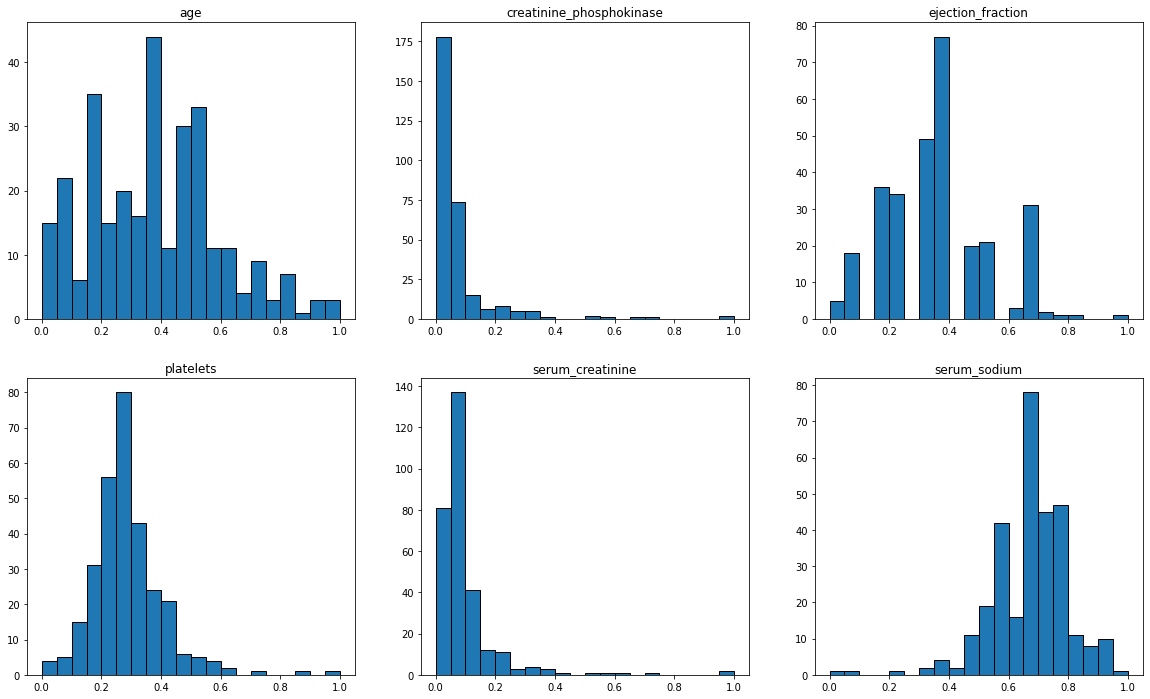

In [363]:
plot_data_frame(data_frame_min_max_scaled, 20)

In [364]:
describe_data_frame(data_frame_min_max_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.38,0.07,0.36,0.29,0.10,0.68
std,0.22,0.12,0.18,0.12,0.12,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.01,0.24,0.23,0.04,0.60
50%,0.36,0.03,0.36,0.29,0.07,0.69
75%,0.55,0.07,0.47,0.34,0.10,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00
variance,0.05,0.02,0.03,0.01,0.01,0.02
mode,0.36,0.07,0.32,0.29,0.06,0.66


In [365]:
data_frame_robust_scaled = pd.DataFrame(
    preprocessing.RobustScaler().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

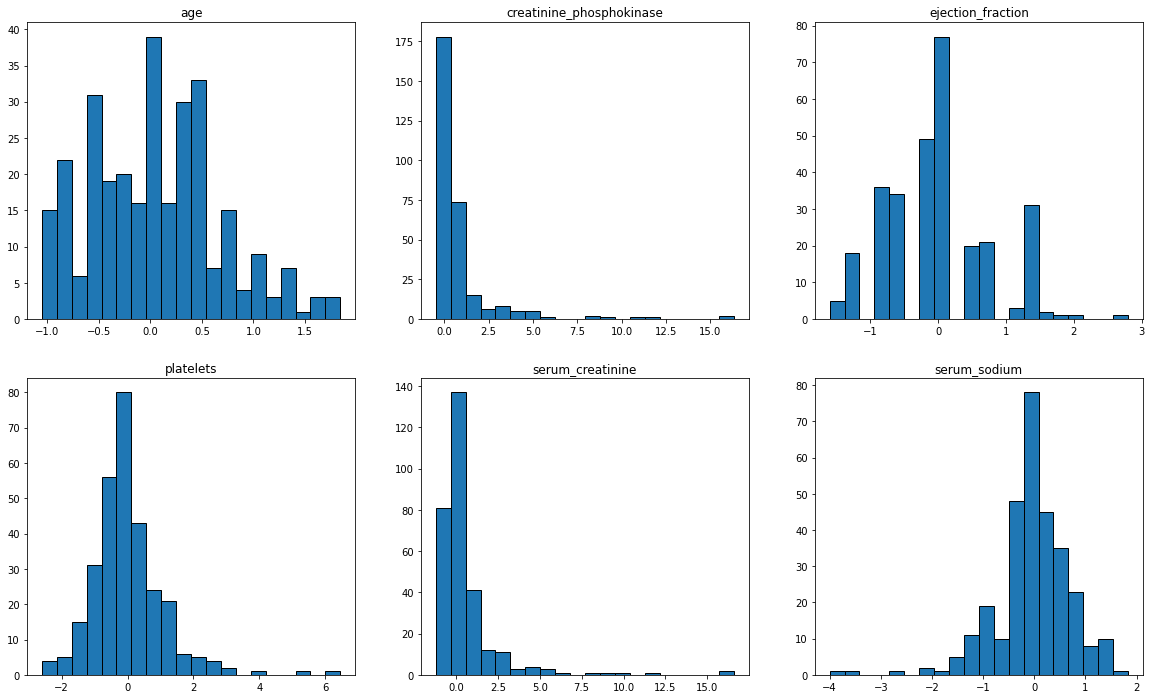

In [366]:
plot_data_frame(data_frame_robust_scaled, 20)

In [367]:
describe_data_frame(data_frame_robust_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.04,0.71,0.01,0.01,0.59,-0.06
std,0.63,2.08,0.79,1.07,2.07,0.74
min,-1.05,-0.49,-1.60,-2.60,-1.20,-4.00
25%,-0.47,-0.29,-0.53,-0.54,-0.40,-0.50
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.53,0.71,0.47,0.46,0.60,0.50
max,1.84,16.35,2.80,6.46,16.60,1.83
variance,0.39,4.34,0.62,1.16,4.28,0.54
mode,0.00,0.71,-0.20,0.01,-0.20,-0.17


In [368]:
data_frame_n5_p10_scaled = pd.DataFrame(
    preprocessing.MinMaxScaler((-5, 10)).fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

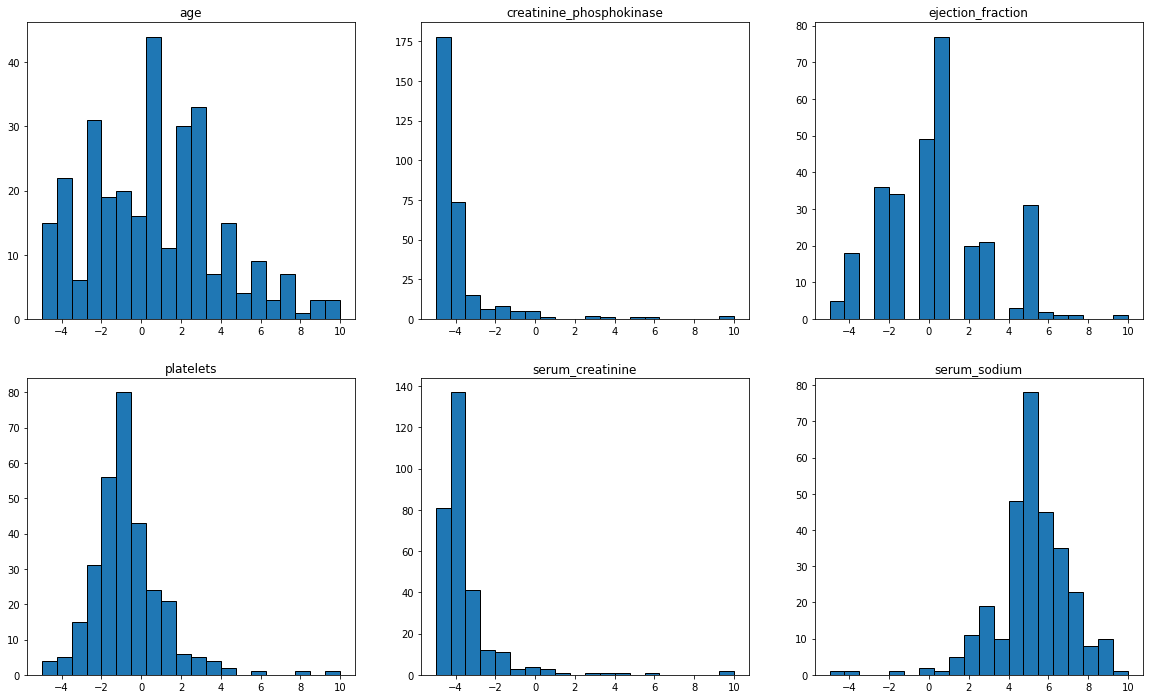

In [369]:
plot_data_frame(data_frame_n5_p10_scaled,20)

In [370]:
describe_data_frame(data_frame_n5_p10_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.68,-3.93,0.47,-0.67,-3.49,5.13
std,3.24,1.86,2.69,1.78,1.74,1.89
min,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00
25%,-2.00,-4.82,-1.36,-1.59,-4.33,4.00
50%,0.45,-4.57,0.45,-0.69,-3.99,5.29
75%,3.18,-3.93,2.05,0.06,-3.48,6.57
max,10.00,10.00,10.00,10.00,10.00,10.00
variance,10.52,3.45,7.23,3.16,3.04,3.58
mode,0.45,-3.93,-0.23,-0.67,-4.16,4.86


# Нелинейные преобразования

In [371]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=4, random_state=0).fit(data)
data_frame_quantile_scaled = pd.DataFrame(
    quantile_transformer.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

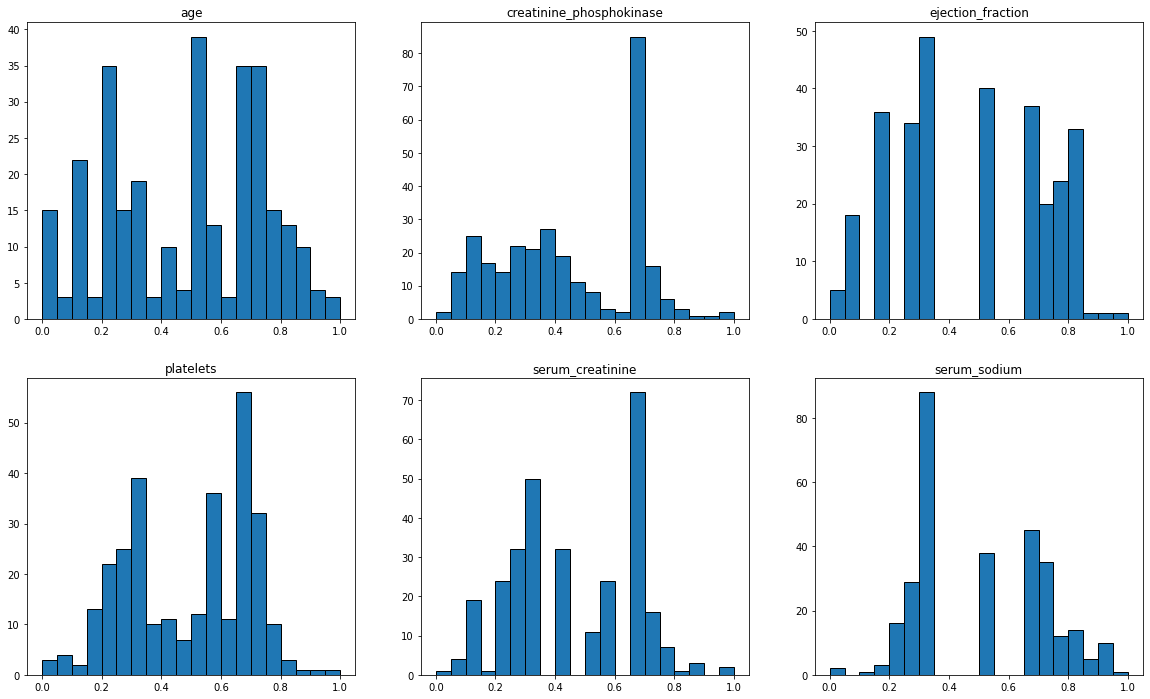

In [372]:
plot_data_frame(data_frame_quantile_scaled, 20)

In [373]:
describe_data_frame(data_frame_quantile_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.49,0.45,0.47,0.49,0.46,0.50
std,0.26,0.23,0.25,0.21,0.21,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.25,0.25,0.31,0.27,0.30
50%,0.50,0.41,0.53,0.56,0.44,0.50
75%,0.72,0.67,0.71,0.68,0.67,0.73
max,1.00,1.00,1.00,1.00,1.00,1.00
variance,0.07,0.05,0.06,0.04,0.04,0.05
mode,0.50,0.67,0.33,0.57,0.33,0.33


In [374]:
data_frame_quantile_normal_scaled = pd.DataFrame(
    preprocessing.QuantileTransformer(n_quantiles=4, random_state=0, output_distribution='normal').fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

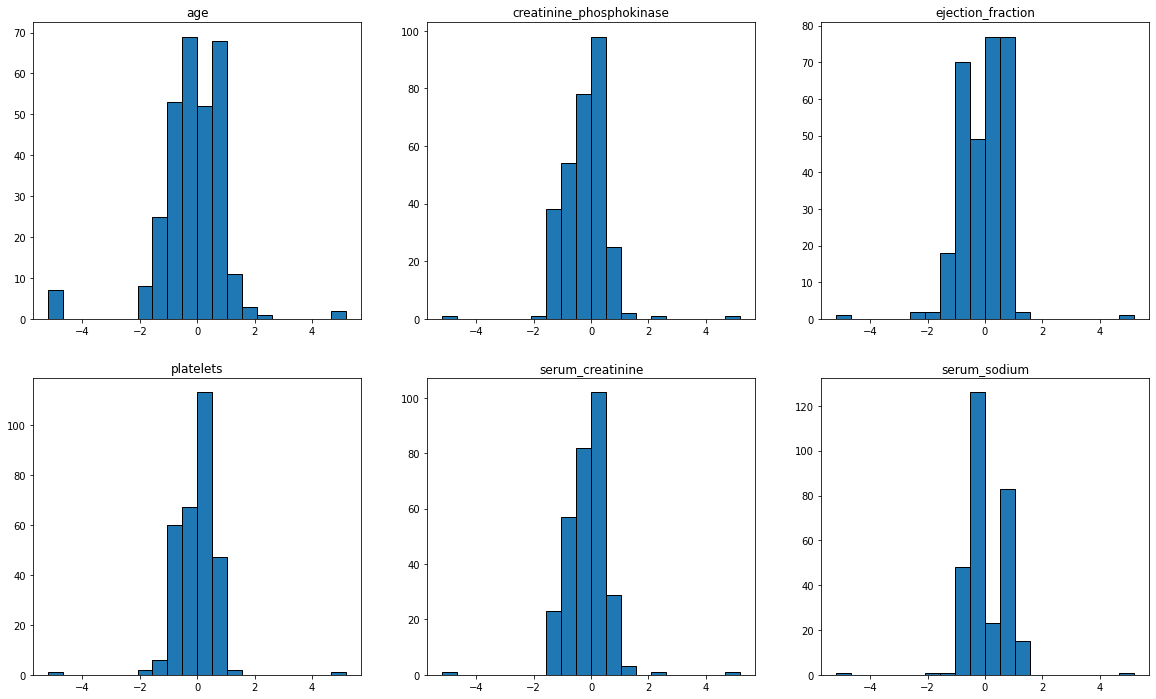

In [375]:
plot_data_frame(data_frame_quantile_normal_scaled, 20)

In [376]:
describe_data_frame(data_frame_quantile_normal_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.12,-0.17,-0.09,-0.03,-0.12,0.02
std,1.16,0.79,0.84,0.71,0.73,0.74
min,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
25%,-0.69,-0.66,-0.66,-0.49,-0.62,-0.51
50%,0.00,-0.22,0.08,0.16,-0.14,0.00
75%,0.59,0.43,0.55,0.47,0.44,0.62
max,5.20,5.20,5.20,5.20,5.20,5.20
variance,1.35,0.63,0.71,0.51,0.53,0.55
mode,0.00,0.43,-0.43,0.18,-0.43,-0.43


In [377]:
data_frame_power_scaled = pd.DataFrame(
    preprocessing.PowerTransformer().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

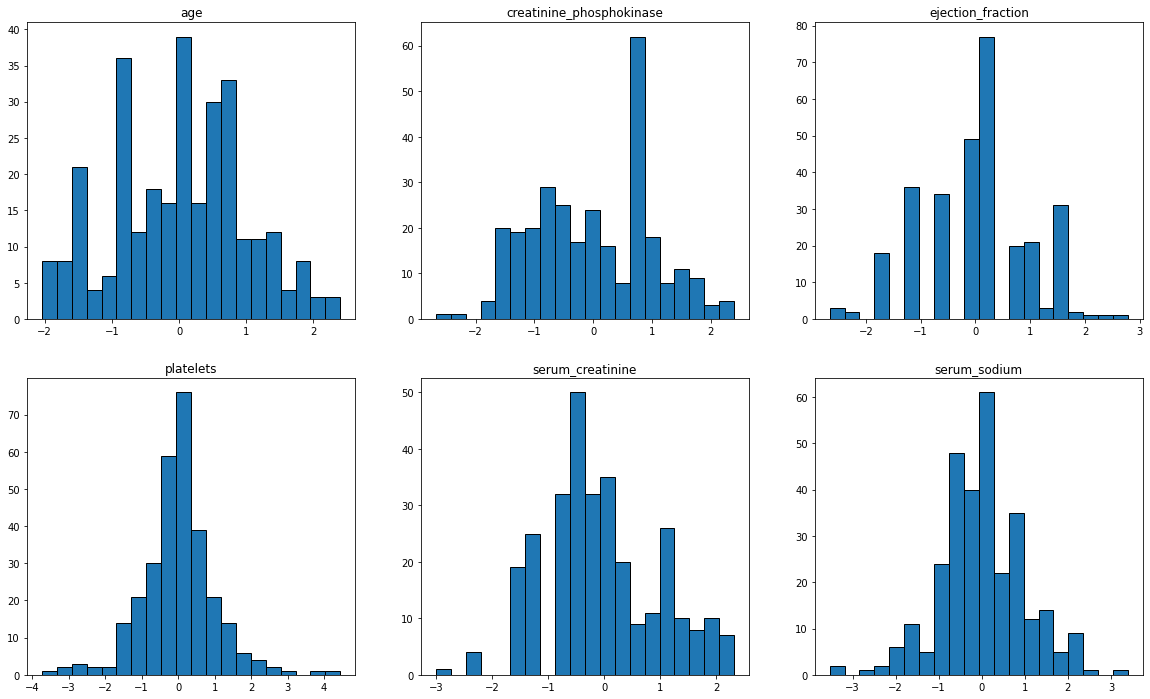

In [378]:
plot_data_frame(data_frame_power_scaled, 20)

In [379]:
describe_data_frame(data_frame_power_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.04,-2.68,-2.66,-3.73,-3.01,-3.54
25%,-0.81,-0.78,-0.63,-0.47,-0.73,-0.69
50%,0.02,-0.04,0.10,0.08,-0.09,-0.01
75%,0.82,0.69,0.66,0.50,0.57,0.77
max,2.40,2.40,2.79,4.44,2.32,3.40
variance,1.00,1.00,1.00,1.00,1.00,1.00
mode,0.02,0.69,-0.16,0.09,-0.38,-0.24


# Дискретизация признаков

In [380]:
bin_discretizer = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal').fit(data)
data_frame_discrete_scaled = pd.DataFrame(
    bin_discretizer.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

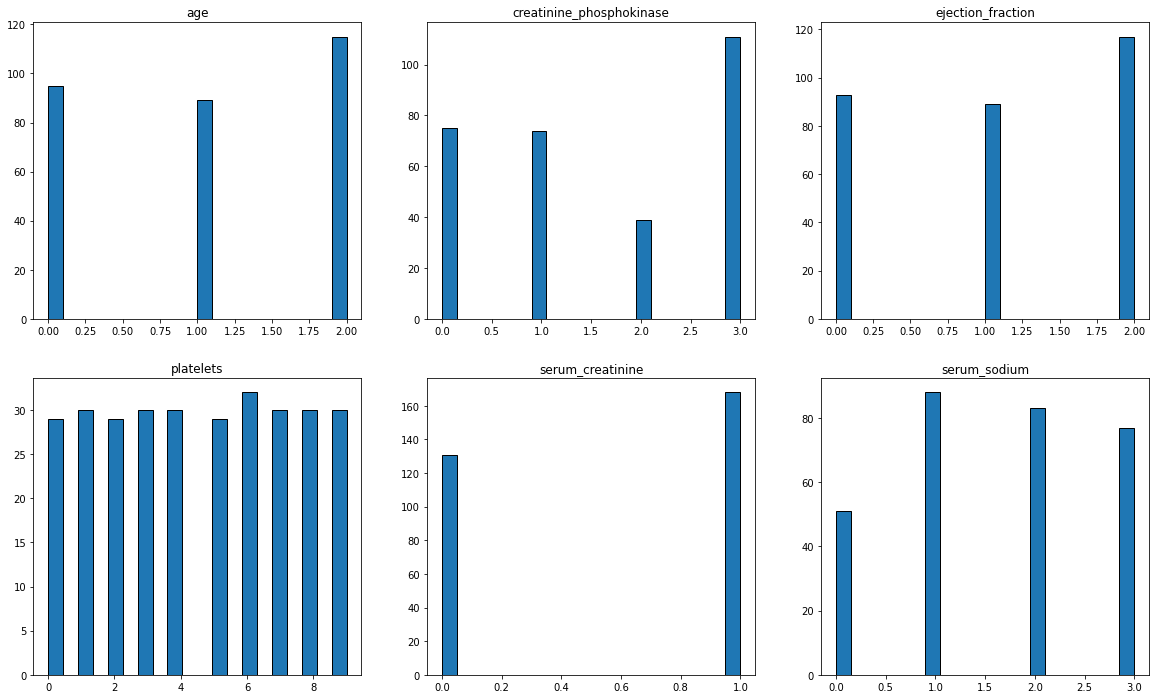

In [381]:
plot_data_frame(data_frame_discrete_scaled, 20)

In [382]:
describe_data_frame(data_frame_discrete_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,1.07,1.62,1.08,4.53,0.56,1.62
std,0.84,1.22,0.84,2.87,0.50,1.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.50,0.00,2.00,0.00,1.00
50%,1.00,2.00,1.00,5.00,1.00,2.00
75%,2.00,3.00,2.00,7.00,1.00,3.00
max,2.00,3.00,2.00,9.00,1.00,3.00
variance,0.70,1.48,0.70,8.23,0.25,1.09
mode,2.00,3.00,2.00,6.00,1.00,1.00


In [383]:
pd.DataFrame(
    data=list(map(lambda arr: pd.Series(arr), bin_discretizer.bin_edges_)),
    index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
).transpose().round(2).replace(np.nan, '')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,40.0,23.0,14.0,25100.0,0.5,113.0
1,55.0,116.5,35.0,153000.0,1.1,134.0
2,65.0,250.0,40.0,196000.0,9.4,137.0
3,95.0,582.0,80.0,221000.0,,140.0
4,,7861.0,,237000.0,,148.0
5,,,,262000.0,,
6,,,,265000.0,,
7,,,,285200.0,,
8,,,,319800.0,,
9,,,,374600.0,,
